In [1]:
# Importing necessary libraries
import os
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Paths
preprocessed_data_path = 'D:/healthcare_analytics_project/data/processed/'
model_data_path = 'D:/healthcare_analytics_project/models/'
visualization_path = 'D:/healthcare_analytics_project/notebooks/visualization_images/'

In [3]:
# Create directories if they don't exist
os.makedirs(model_data_path, exist_ok=True)
os.makedirs(visualization_path, exist_ok=True)

In [4]:
# Load preprocessed data
train_data = np.load(os.path.join(preprocessed_data_path, 'train_data.npz'))
test_data = np.load(os.path.join(preprocessed_data_path, 'test_data.npz'))

X_train, y_train = train_data['X_train'], train_data['y_train']
X_test, y_test = test_data['X_test'], test_data['y_test']

In [5]:
# Display dataset shapes
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}")


Training data shape: (4961, 18), Training labels shape: (4961,)
Testing data shape: (1241, 18), Testing labels shape: (1241,)


In [6]:
# Model training - Logistic Regression
logistic_model = LogisticRegression(random_state=42, max_iter=1000)
logistic_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=42)

In [7]:
# Model training - Random Forest
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)
random_forest_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Evaluate models
def evaluate_model(model, X, y, model_name):
    y_pred = model.predict(X)
    y_prob = model.predict_proba(X)[:, 1]
    
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    roc_auc = roc_auc_score(y, y_prob)
    
    print(f"Evaluation Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"AUC-ROC: {roc_auc:.2f}")
    
    return y_pred, y_prob

In [9]:
# Evaluate Logistic Regression
print("\nLogistic Regression Performance:")
y_pred_lr, y_prob_lr = evaluate_model(logistic_model, X_test, y_test, "Logistic Regression")



Logistic Regression Performance:
Evaluation Metrics for Logistic Regression:
Accuracy: 0.92
Precision: 0.99
Recall: 0.85
F1-Score: 0.91
AUC-ROC: 0.95


In [10]:
# Evaluate Random Forest
print("\nRandom Forest Performance:")
y_pred_rf, y_prob_rf = evaluate_model(random_forest_model, X_test, y_test, "Random Forest")



Random Forest Performance:
Evaluation Metrics for Random Forest:
Accuracy: 0.91
Precision: 0.98
Recall: 0.84
F1-Score: 0.90
AUC-ROC: 0.95


In [11]:
# Save the best-performing model (choose based on evaluation metrics)
best_model = random_forest_model  # Assume Random Forest performs better
best_model_path = os.path.join(model_data_path, 'best_model.pkl')
joblib.dump(best_model, best_model_path)
print(f"Best model saved to {best_model_path}")

Best model saved to D:/healthcare_analytics_project/models/best_model.pkl


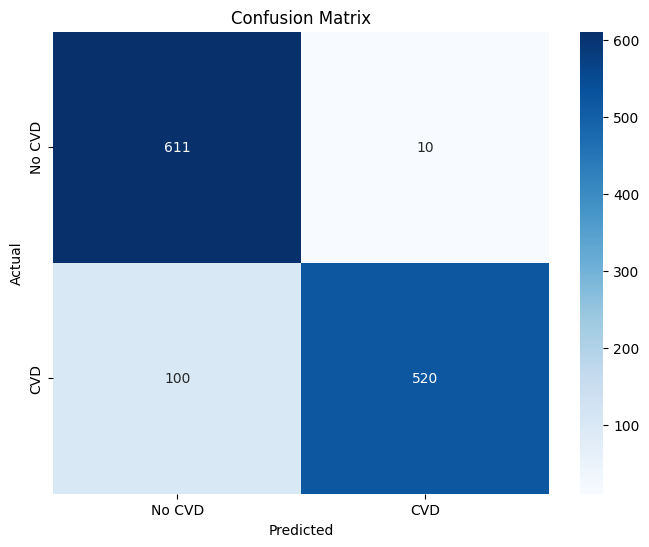

Confusion matrix saved to D:/healthcare_analytics_project/notebooks/visualization_images/confusion_matrix.png


In [12]:
# Confusion matrix for the best model
conf_matrix = confusion_matrix(y_test, best_model.predict(X_test))
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No CVD', 'CVD'], yticklabels=['No CVD', 'CVD'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
confusion_matrix_path = os.path.join(visualization_path, 'confusion_matrix.png')
plt.savefig(confusion_matrix_path)
plt.show()
print(f"Confusion matrix saved to {confusion_matrix_path}")

In [13]:
# Classification report
print("\nClassification Report:")
print(classification_report(y_test, best_model.predict(X_test)))


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.98      0.92       621
           1       0.98      0.84      0.90       620

    accuracy                           0.91      1241
   macro avg       0.92      0.91      0.91      1241
weighted avg       0.92      0.91      0.91      1241

